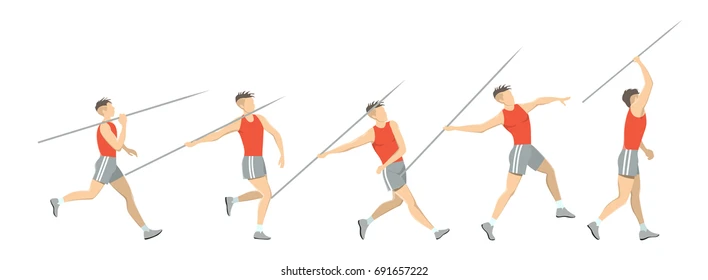

# The Art of Javelin Flight: A Data-driven Exploration

https://www.kaggle.com/datasets/the-guardian/olympic-games

The javelin throw, an ancient athletic event that dates back thousands of years, embodies the essence of power, precision, and skill. As one of the oldest recorded sports in human history, it has evolved from its origins as a hunting and warfare technique to become a celebrated discipline in modern-day athletics.

Originating in ancient Greece and Scandinavia, the javelin was initially employed as a hunting tool, allowing hunters to hurl spears over long distances to strike down prey. Over time, it transitioned into a military weapon that the Greeks later incorporated into their Olympic Games, recognizing its athletic prowess and the spectacle it created.

Throughout its history, the javelin throw has witnessed various rule changes and advancements in equipment design to ensure safety and fairness. These developments have shaped the sport and facilitated remarkable achievements in distance records. In this article, I will be looking mainly at the Olympics, guiding you through the steps I took to uncover trends and find potential answers to questions such as: who is the best javelin thrower? Do some countries produce more successful throwers? And many more!

Specifc Questions I am Looking to Answer:
1. Who is the best javelin thrower?
2. Do some countries produce more successful throwers?
3. Are throwing distances increasing or decreading over time?

The first step was to find a dataset of Olympics data. The data I used can be found at https://www.kaggle.com/datasets/the-guardian/olympic-games.  Import the Datasets Summer (summer.csv) dictionary (dictionary.csv) and Inspect! Since the javelin throw is a summer event, the winter dataset is not necessary

In [1]:
import pandas as pd

summer = pd.read_csv("summer.csv")
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [2]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


The summer dataset includes 31165 rows of many different sports and events, but since I am only interested in javelin, I will create a seperate DataFrame which only includes the javelin throw

In [3]:
javelin_df = summer[summer['Event']=='Javelin Throw'].copy()
javelin_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1258,1908,London,Athletics,Athletics,"NILSSON, Otto",SWE,Men,Javelin Throw,Bronze
1259,1908,London,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold
1260,1908,London,Athletics,Athletics,"HALSE, Arne",NOR,Men,Javelin Throw,Silver
2108,1912,Stockholm,Athletics,Athletics,"KOVACS, Mor",HUN,Men,Javelin Throw,Bronze
2109,1912,Stockholm,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold
...,...,...,...,...,...,...,...,...,...
29737,2012,London,Athletics,Athletics,"RUUSKANEN, Antti",FIN,Men,Javelin Throw,Silver
29738,2012,London,Athletics,Athletics,"VESELY, Vitezslav",CZE,Men,Javelin Throw,Bronze
29739,2012,London,Athletics,Athletics,"SPOTAKOVA, Barbora",CZE,Women,Javelin Throw,Gold
29740,2012,London,Athletics,Athletics,"OBERGFOELL, Christina",GER,Women,Javelin Throw,Silver


In [4]:
javelin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 1258 to 29741
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        129 non-null    int64 
 1   City        129 non-null    object
 2   Sport       129 non-null    object
 3   Discipline  129 non-null    object
 4   Athlete     129 non-null    object
 5   Country     129 non-null    object
 6   Gender      129 non-null    object
 7   Event       129 non-null    object
 8   Medal       129 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.1+ KB


Now it is down to 129 rows of javelin throw medalists. Since summer.csv includes olympics up to 2012, I will scrape the data for the 2016 Rio and 2020 Tokyo Olympics and add the records to the DataFrame

In [5]:
# import requests
# from bs4 import BeautifulSoup
# import time


# headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:82.0) Gecko/20100101 Firefox/82.0' } 
# result_list = []
# genders=['men','women']
# games=['rio-2016', 'tokyo-2020']

# for game in games:
#     for gender in genders:
#         try:
#             mens = requests.get(f'https://olympics.com/en/olympic-games/{game}/results/athletics/javelin-throw-{gender}',headers=headers).text
#             soup = BeautifulSoup(mens, 'html.parser')

#             for i in range(3):
#                 row=[]
#                 row.append(soup.find_all(name='span', class_='OcsTextstyles__StyledText-sc-1a1i41u-0 cuettq')[i].string)
#                 row.append(soup.find_all(name='span', class_='styles__CountryName-sc-1r5phm6-1 eQULfE')[i].string)
#                 row.append(soup.find_all(name='h3', class_='styles__AthleteName-sc-1yhe77y-3 kWcbtL')[i].string)
#                 row.append(soup.find_all(name='div', class_='styles__ResultInfoWrapper-sc-rh9yz9-2 ghLRuR')[i].text.split(':')[1])

#                 city=(game.rsplit("-",1)[0]).replace('-', " ").title()
#                 year=int(game.rsplit("-",1)[1])
#                 row.append(year)
#                 row.append(city)
#                 row.append(gender)
#                 row.append('Athletics')
#                 row.append('Javelin Throw')
#                 result_list.append(row)
#         except:
#             mens = requests.get(f'https://olympics.com/en/olympic-games/{game}/results/athletics/{gender}-s-javelin-throw',headers=headers).text
#             soup = BeautifulSoup(mens, 'html.parser')
                
#             for i in range(3):
#                 row=[]
#                 row.append(soup.find_all(name='span', class_='OcsTextstyles__StyledText-sc-1a1i41u-0 cuettq')[i].string)
#                 row.append(soup.find_all(name='span', class_='styles__CountryName-sc-1r5phm6-1 eQULfE')[i].string)
#                 row.append(soup.find_all(name='h3', class_='styles__AthleteName-sc-1yhe77y-3 kWcbtL')[i].string)
#                 row.append(soup.find_all(name='div', class_='styles__ResultInfoWrapper-sc-rh9yz9-2 ghLRuR')[i].text.split(':')[1])

#                 city=(game.rsplit("-",1)[0]).replace('-', " ").title()
#                 year=int(game.rsplit("-",1)[1])
#                 row.append(year)
#                 row.append(city)
#                 row.append(gender)
#                 row.append('Athletics')
#                 row.append('Javelin Throw')
#                 result_list.append(row)

#         time.sleep(3)
#     time.sleep(3)
    
    

# print(result_list)

[['G', 'GER', 'thomas rohler', '90.3', 2016, 'Rio', 'men', 'Athletics', 'Javelin Throw'], ['S', 'KEN', 'julius yego', '88.24', 2016, 'Rio', 'men', 'Athletics', 'Javelin Throw'], ['B', 'TTO', 'keshorn walcott', '85.38', 2016, 'Rio', 'men', 'Athletics', 'Javelin Throw'], ['G', 'CRO', 'sara kolak', '66.18', 2016, 'Rio', 'women', 'Athletics', 'Javelin Throw'], ['S', 'RSA', 'sunette viljoen', '64.92', 2016, 'Rio', 'women', 'Athletics', 'Javelin Throw'], ['B', 'CZE', 'barbora spotakova', '64.8', 2016, 'Rio', 'women', 'Athletics', 'Javelin Throw'], ['G', 'IND', 'neeraj chopra', '87.58', 2020, 'Tokyo', 'men', 'Athletics', 'Javelin Throw'], ['S', 'CZE', 'jakub vadlejch', '86.67', 2020, 'Tokyo', 'men', 'Athletics', 'Javelin Throw'], ['B', 'CZE', 'vitezslav vesely', '85.44', 2020, 'Tokyo', 'men', 'Athletics', 'Javelin Throw'], ['G', 'CHN', 'shiying liu', '66.34', 2020, 'Tokyo', 'women', 'Athletics', 'Javelin Throw'], ['S', 'POL', 'maria andrejczyk', '64.61', 2020, 'Tokyo', 'women', 'Athletics', '

In [68]:
# rio_tokyo = pd.DataFrame(result_list,columns=['Medal', 'Country', 'Athlete', 'Distance', 'Year', 'City', 'Gender', 'Sport', 'Event'])
rio_tokyo

,Medal,Country,Athlete,Distance,Year,City,Gender,Sport,Event,Discipline
0,Gold,GER,"ROHLER, Thomas",90.3,2016,Rio,Men,Athletics,Javelin Throw,Athletics
1,Silver,KEN,"YEGO, Julius",88.24,2016,Rio,Men,Athletics,Javelin Throw,Athletics
2,Bronze,TTO,"WALCOTT, Keshorn",85.38,2016,Rio,Men,Athletics,Javelin Throw,Athletics
3,Gold,CRO,"KOLAK, Sara",66.18,2016,Rio,Women,Athletics,Javelin Throw,Athletics
4,Silver,RSA,"VILJOEN, Sunette",64.92,2016,Rio,Women,Athletics,Javelin Throw,Athletics
5,Bronze,CZE,"SPOTAKOVA, Barbora",64.8,2016,Rio,Women,Athletics,Javelin Throw,Athletics
6,Gold,IND,"CHOPRA, Neeraj",87.58,2020,Tokyo,Men,Athletics,Javelin Throw,Athletics
7,Silver,CZE,"VADLEJCH, Jakub",86.67,2020,Tokyo,Men,Athletics,Javelin Throw,Athletics
8,Bronze,CZE,"VESELY, Vitezslav",85.44,2020,Tokyo,Men,Athletics,Javelin Throw,Athletics
9,Gold,CHN,"LIU, Shiying",66.34,2020,Tokyo,Women,Athletics,Javelin Throw,Athletics


In [67]:
# medal_map = {'G': 'Gold', 'S':'Silver', 'B':'Bronze'}
# rio_tokyo['Medal']=rio_tokyo['Medal'].map(medal_map)
# rio_tokyo['Gender']=rio_tokyo['Gender'].apply(lambda x: x.title())

# def reformat_name(x):
#     split_name = x.rsplit(" ")
#     first = split_name[0].strip().title()
#     last = split_name[1].strip().upper()
#     return f'{last}, {first}'
    
# rio_tokyo['Athlete']=rio_tokyo['Athlete'].apply(reformat_name)
# rio_tokyo['Discipline']='Athletics'

# rio_tokyo.to_csv('rio_tokyo.csv',index=False)

The dataFrame above shows the additional Data that was scraped from Olympics.com. The next step is to add these records to the main javelin DataFrame

In [8]:
rio_tokyo=pd.read_csv('rio_tokyo.csv')

javelin_df=pd.concat([javelin_df,rio_tokyo],ignore_index=True)
javelin_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Distance
0,1908,London,Athletics,Athletics,"NILSSON, Otto",SWE,Men,Javelin Throw,Bronze,NaN
1,1908,London,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,NaN
2,1908,London,Athletics,Athletics,"HALSE, Arne",NOR,Men,Javelin Throw,Silver,NaN
3,1912,Stockholm,Athletics,Athletics,"KOVACS, Mor",HUN,Men,Javelin Throw,Bronze,NaN
4,1912,Stockholm,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,NaN
...,...,...,...,...,...,...,...,...,...,...
136,2020,Tokyo,Athletics,Athletics,"VADLEJCH, Jakub",CZE,Men,Javelin Throw,Silver,86.67
137,2020,Tokyo,Athletics,Athletics,"VESELY, Vitezslav",CZE,Men,Javelin Throw,Bronze,85.44
138,2020,Tokyo,Athletics,Athletics,"LIU, Shiying",CHN,Women,Javelin Throw,Gold,66.34
139,2020,Tokyo,Athletics,Athletics,"ANDREJCZYK, Maria",POL,Women,Javelin Throw,Silver,64.61


The javelin_df now has 141 rows, capturing data for all Olympics. Next, I want to add a column that shows the full country name instead of only the country code. This information can be found on dictionary.csv to I will import and merge these together.

In [9]:
dic = pd.read_csv("dictionary.csv")
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


#### Merge the 2 DataFrames

In [10]:
javelin_df = javelin_df.merge(right=dic, how='left', left_on='Country', right_on='Code').drop(columns=['Code']).rename(columns={'Country_x':'Code', 'Country_y':'Country'})
javelin_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Distance,Country,Population,GDP per Capita
0,1908,London,Athletics,Athletics,"NILSSON, Otto",SWE,Men,Javelin Throw,Bronze,NaN,Sweden,9798871.0,50579.673649
1,1908,London,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,NaN,Sweden,9798871.0,50579.673649
2,1908,London,Athletics,Athletics,"HALSE, Arne",NOR,Men,Javelin Throw,Silver,NaN,Norway,5195921.0,74400.369777
3,1912,Stockholm,Athletics,Athletics,"KOVACS, Mor",HUN,Men,Javelin Throw,Bronze,NaN,Hungary,9844686.0,12363.543460
4,1912,Stockholm,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,NaN,Sweden,9798871.0,50579.673649


Notice now the Country, Population, and GDP per Capita columns from the dictionary DataFrame have been added to the summer Dataframe. Next inspect the new DataFrame for missing values. We should expect missing values for Distance, Population and GDP since where were missing values in the dictionary, but all other columns should have no missing values 

In [11]:
javelin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            141 non-null    int64  
 1   City            141 non-null    object 
 2   Sport           141 non-null    object 
 3   Discipline      141 non-null    object 
 4   Athlete         141 non-null    object 
 5   Code            141 non-null    object 
 6   Gender          141 non-null    object 
 7   Event           141 non-null    object 
 8   Medal           141 non-null    object 
 9   Distance        12 non-null     float64
 10  Country         106 non-null    object 
 11  Population      106 non-null    float64
 12  GDP per Capita  103 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 15.4+ KB


It looks like there are missing Country values meaning some country codes are not listed on the dictionary csv. The code below checks which country codes are missing.

In [12]:
javelin_df[javelin_df['Country'].isnull()]['Code'].unique()

array(['URS', 'TCH', 'EUA', 'ROU', 'FRG', 'GDR', 'EUN', 'TTO'],
      dtype=object)

After a google search, I have created a mapping of each missing code and their respective country names. The missing Country values in javelin_df will be filled in accordingly.

In [13]:
missing_codes = {
    'URS': 'Soviet Union',
    'GDR': 'East Germany',
    'ROU': 'Romania',
     'FRG': 'West Germany',
     'TCH': 'Czechoslovakia',
     'EUN': 'Unified Team',
     'EUA': 'Unified Team of Germany',
     'TTO': 'Trinidad and Tobago',
}

javelin_df.loc[javelin_df[javelin_df['Country'].isnull()].index, 'Country']=javelin_df[javelin_df['Country'].isnull()]['Code'].map(missing_codes)

In [14]:
javelin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            141 non-null    int64  
 1   City            141 non-null    object 
 2   Sport           141 non-null    object 
 3   Discipline      141 non-null    object 
 4   Athlete         141 non-null    object 
 5   Code            141 non-null    object 
 6   Gender          141 non-null    object 
 7   Event           141 non-null    object 
 8   Medal           141 non-null    object 
 9   Distance        12 non-null     float64
 10  Country         141 non-null    object 
 11  Population      106 non-null    float64
 12  GDP per Capita  103 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 19.5+ KB


No more missing Country values. Now lets scrape the web for the rest of the distances. In order for this to be achieved, the following additional data cleansing has to take place.

In [15]:
#equestrian was held in stockholm since Australia has strict animal quarantine laws. Lets change to 
javelin_df.loc[javelin_df['City']=='Melbourne / Stockholm','City']= 'Melbourne'

In [16]:
# should say mexico city instead of mexico
javelin_df.loc[javelin_df['City']=='Mexico','City']='Mexico City'

In [17]:
# a list of olympic games formatted
games = (javelin_df["City"].str.lower().str.replace(" ","-") + "-" +  javelin_df['Year'].astype(str)).unique()

In [18]:
# import requests
# from bs4 import BeautifulSoup
# import time

# headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:82.0) Gecko/20100101 Firefox/82.0' } 
# result_list = []
# genders=['men','women']

# for game in games:
#     for gender in genders:
#         try:
#             mens = requests.get(f'https://olympics.com/en/olympic-games/{game}/results/athletics/javelin-throw-{gender}',headers=headers).text
#             soup = BeautifulSoup(mens, 'html.parser')


#             for i in range(3):
#                 row=[]
#                 row.append(soup.find_all(name='span', class_='OcsTextstyles__StyledText-sc-1a1i41u-0 cuettq')[i].string)
#                 row.append(soup.find_all(name='span', class_='styles__CountryName-sc-1r5phm6-1 eQULfE')[i].string)
#                 row.append(soup.find_all(name='h3', class_='styles__AthleteName-sc-1yhe77y-3 kWcbtL')[i].string)
#                 row.append(soup.find_all(name='div', class_='styles__ResultInfoWrapper-sc-rh9yz9-2 ghLRuR')[i].text.split(':')[1])

#                 city=(game.rsplit("-",1)[0]).replace('-', " ").title()
#                 year=int(game.rsplit("-",1)[1])
#                 row.append(year)
#                 row.append(city)
#                 row.append(gender)

#                 result_list.append(row)
#         except:
#             pass
#         time.sleep(3)
#     time.sleep(3)
    
    

# print(result_list)

In [19]:
# test = pd.DataFrame(result_list, columns=['Medal', 'Code', 'Athlete', 'Distance', 'Year', 'City', 'Gender'])

# medal_map = {'G': 'Gold', 'S':'Silver', 'B':'Bronze'}
# test['Medal']=test['Medal'].map(medal_map)
# test['Gender']=test['Gender'].apply(lambda x: x.title())
# test.to_csv('javelin_distance.csv', index=False)

In [20]:
distance = pd.read_csv('javelin_distance.csv')

javelin_df = javelin_df.merge(distance[['Distance','Year','Gender','Medal']],how='left',on=['Year','Gender','Medal']).fillna(0)

In [21]:
javelin_df['Distance_x']=javelin_df['Distance_x'].astype('float')
javelin_df['Distance']=javelin_df['Distance_x']+javelin_df['Distance_y']
javelin_df.drop(columns=['Distance_y', 'Distance_x','GDP per Capita', 'Population'], inplace=True)
javelin_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Distance
0,1908,London,Athletics,Athletics,"NILSSON, Otto",SWE,Men,Javelin Throw,Bronze,Sweden,47.11
1,1908,London,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,Sweden,54.83
2,1908,London,Athletics,Athletics,"HALSE, Arne",NOR,Men,Javelin Throw,Silver,Norway,50.57
3,1912,Stockholm,Athletics,Athletics,"KOVACS, Mor",HUN,Men,Javelin Throw,Bronze,Hungary,55.50
4,1912,Stockholm,Athletics,Athletics,"LEMMING, Eric",SWE,Men,Javelin Throw,Gold,Sweden,60.64
...,...,...,...,...,...,...,...,...,...,...,...
136,2020,Tokyo,Athletics,Athletics,"VADLEJCH, Jakub",CZE,Men,Javelin Throw,Silver,Czech Republic,86.67
137,2020,Tokyo,Athletics,Athletics,"VESELY, Vitezslav",CZE,Men,Javelin Throw,Bronze,Czech Republic,85.44
138,2020,Tokyo,Athletics,Athletics,"LIU, Shiying",CHN,Women,Javelin Throw,Gold,China,66.34
139,2020,Tokyo,Athletics,Athletics,"ANDREJCZYK, Maria",POL,Women,Javelin Throw,Silver,Poland,64.61


In [22]:
javelin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        141 non-null    int64  
 1   City        141 non-null    object 
 2   Sport       141 non-null    object 
 3   Discipline  141 non-null    object 
 4   Athlete     141 non-null    object 
 5   Code        141 non-null    object 
 6   Gender      141 non-null    object 
 7   Event       141 non-null    object 
 8   Medal       141 non-null    object 
 9   Country     141 non-null    object 
 10  Distance    141 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 13.2+ KB


All the missing distance value have been filled with the data scraped from Olympics.com. Since we not be using data from the population and GDP column, these have been dropped/removed from the DataFrame. Now that we have a clean and complete view of the javelin throw even at the Olympics, we can start analyzing.

What is the all time olympic record for men?

With a 94.58M throw set in 1976, Miklos Nemeth of Hundary holds this record

In [23]:
javelin_df[javelin_df['Distance']==javelin_df['Distance'].max()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Distance
70,1976,Montreal,Athletics,Athletics,"NEMETH, Miklos",HUN,Men,Javelin Throw,Gold,Hungary,94.58


What is the olympic record for men with modern javelin specifications?

More details will be provided later in this analysis, but in accordance to modern day javelin design specifications, Andreas Thorkildsen holds this record with a throw of 90.57M

In [24]:
modern_record = javelin_df[javelin_df['Year']>1986]['Distance'].max()
javelin_df[javelin_df['Distance']==90.57]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Distance
118,2008,Beijing,Athletics,Athletics,"THORKILDSEN, Andreas",NOR,Men,Javelin Throw,Gold,Norway,90.57


What is the all time olympic record for women?

Petra Felke-Meier of East Germany set this record in 1988 with a throw of 74.68M

In [25]:
javelin_df.loc[(javelin_df['Distance']==javelin_df[javelin_df['Gender']=='Women']['Distance'].max())]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Distance
91,1988,Seoul,Athletics,Athletics,"FELKE-MEIER, Petra",GDR,Women,Javelin Throw,Gold,East Germany,74.68


What is the olympic record for women with modern javelin specifications?

Osleidys Menendez of Cuba with a throw of 71.53M in 2004

In [26]:
javelin_df[(javelin_df['Gender']=='Women') & (javelin_df['Year']>1999)].nlargest(1, 'Distance')

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Distance
115,2004,Athens,Athletics,Athletics,"MENENDEZ, Osleidys",CUB,Women,Javelin Throw,Gold,Cuba,71.53


Are there athletes that have won a medal in multiple olympics?

In [70]:
ath_tot=pd.crosstab(javelin_df['Athlete'], javelin_df['Medal'])
ath_tot['Total']=ath_tot['Bronze'] + ath_tot['Silver'] +ath_tot['Gold']
ath_tot.sort_values('Total', ascending=False).head(10)


Medal,Bronze,Gold,Silver,Total
Athlete,,,,
"ZELEZNY, Jan",0,3,1,4
"KULCSAR, Gergely",2,0,1,3
"BACKLEY, Steve",1,0,2,3
"RATY, Seppo Henrik",2,0,1,3
"SPOTAKOVA, Barbora",1,2,0,3
"LUSIS, Yanis",1,1,1,3
"FLEISCHER, Mathilde (Tilly)",1,1,0,2
"SCHMIDT, Kathryn Joan",2,0,0,2
"LEMMING, Eric",0,2,0,2


Next, I am going to create some visualizations using the seaborn library.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/joekimurasmith/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [29]:
top=javelin_df.groupby('Country').count().sort_values(by='Code', ascending=False).head(10)['Medal'].to_frame()
top_10_cat=javelin_df[javelin_df['Country'].apply(lambda x: x in top.index)].groupby(['Country','Medal']).count().reset_index()

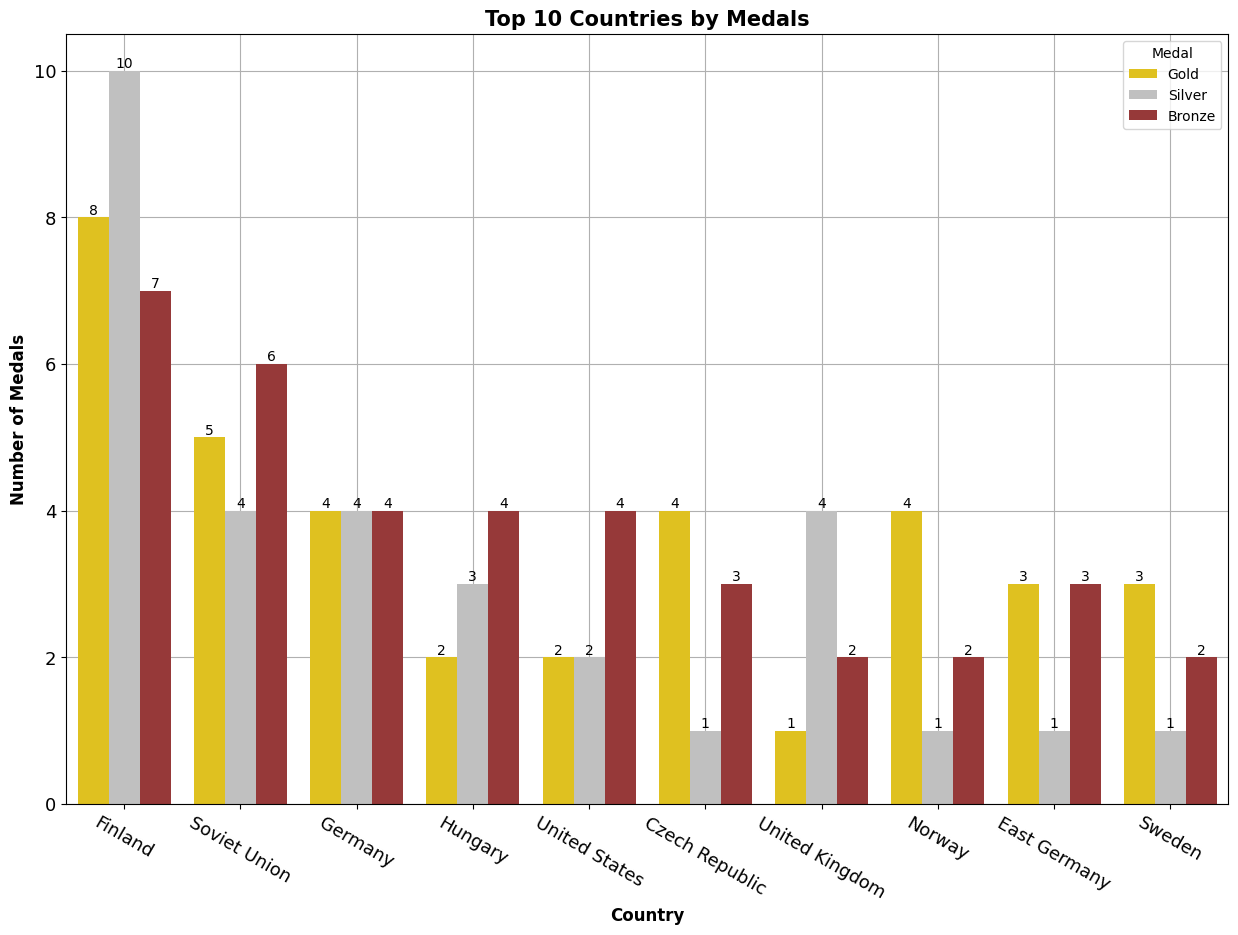

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=top_10_cat ,x='Country',y='Year',hue='Medal',ax=ax, hue_order=['Gold', 'Silver', 'Bronze'],
           palette=["gold", "silver", "brown"], order=top.index)
for i in ax.containers:
    ax.bar_label(i,)

ax.set_axisbelow(True)
ax.grid()
plt.xlabel('Country', fontsize='12',fontweight='bold')
plt.ylabel('Number of Medals', fontsize='12',fontweight='bold')
plt.xticks(fontsize='13', rotation=330, ha='center')
plt.yticks(fontsize='13')
plt.title('Top 10 Countries by Medals', fontsize='15',fontweight='bold')
plt.show()

As shown in the chart, Finland outperforms all other countries by a large margin in terms of total medals won. For this, Finalnd has often been called the "Home of the Javelin" and many athletes from around the world travel there to attend training camps and learn from the best.

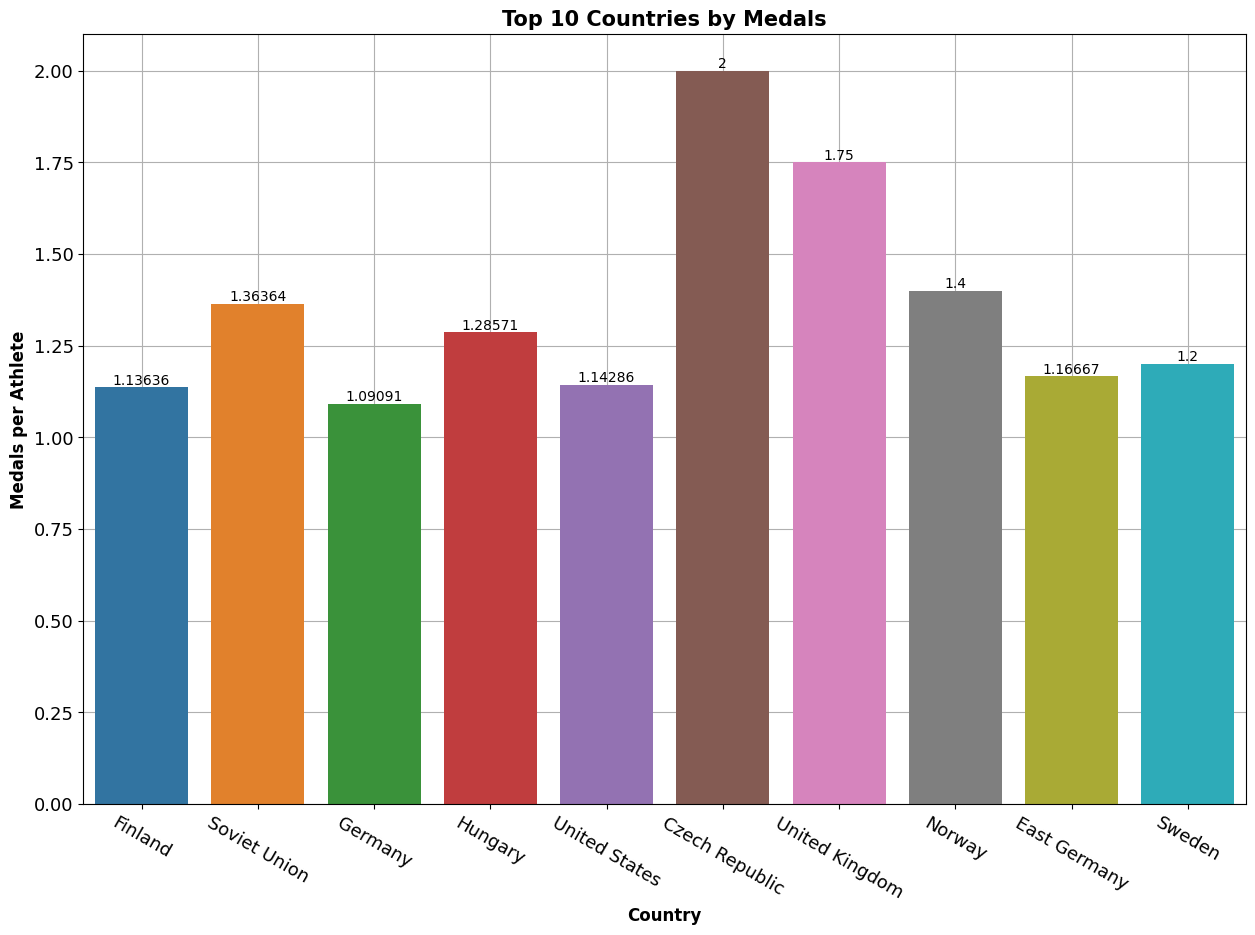

In [31]:
no_ppl_medaling_per_cntry = javelin_df.groupby('Country')['Athlete'].nunique()
no_ppl_medaling_per_cntry
medal_per_athlete = top.merge(no_ppl_medaling_per_cntry,how='left', left_index=True, right_index=True)
medal_per_athlete

medal_per_athlete['avg_medals_per_athlete']=medal_per_athlete['Medal']/medal_per_athlete['Athlete']
medal_per_athlete

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=medal_per_athlete ,x=medal_per_athlete.index,y='avg_medals_per_athlete',ax=ax)
for i in ax.containers:
    ax.bar_label(i,)

ax.set_axisbelow(True)
ax.grid()
plt.xlabel('Country', fontsize='12',fontweight='bold')
plt.ylabel('Medals per Athlete', fontsize='12',fontweight='bold')
plt.xticks(fontsize='13', rotation=330, ha='center')
plt.yticks(fontsize='13')
plt.title('Top 10 Countries by Medals', fontsize='15',fontweight='bold')
plt.show()

The graph above shows the average number of medals won per athlete. For example, each athlete in the Czech Republic has won an average of 2 medals. This implies that while nations such as Finland and Germany produce a large number of world class javelin throwers, the Czech Republic and UK produce fewer but exceptional javelin throwers.

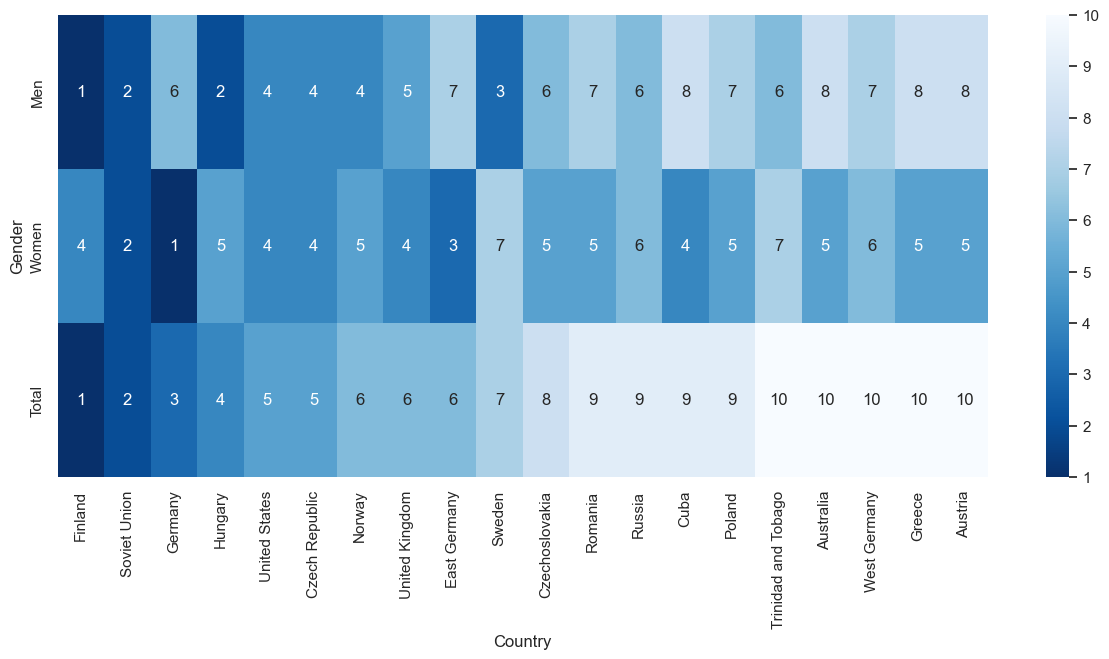

In [50]:
gender_count = pd.crosstab(javelin_df['Country'], javelin_df['Gender'])
gender_count['Total']=gender_count['Men']+gender_count['Women']
ranked_total = gender_count.rank(ascending=False, method='dense').sort_values('Total')

sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(ranked_total.head(20).transpose(),annot=True, cmap='Blues_r')
plt.show()

This heatplot ranks countries by the total number of medals won, but seperated by gender. For example, Finlands men team rank no.1 in total medals relative to mens teams. However, Finlands women team rank no.4 in terms of total medals won in comparison to other countries' womens teams. To get a more clear understanding of performance disparity between men and women for countries, view below

<Axes: xlabel='Country'>

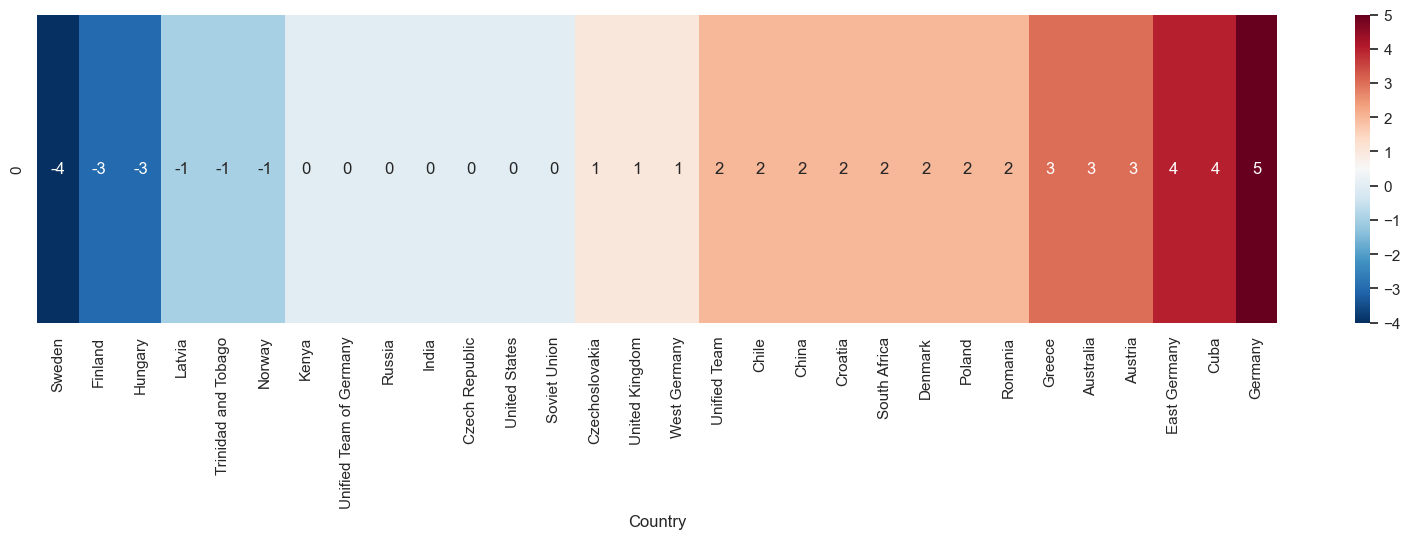

In [64]:
sns.set(rc={'figure.figsize':(20,4)})
sns.heatmap((ranked_total['Men']-ranked_total['Women']).sort_values().to_frame().transpose(),annot=True, cmap='RdBu_r')

Each number represents the difference in ranking between men and women for that respective country. For example, Sweden's score is -4 because men scored 3rd and women scored 7th so the difference is -4. This can be interpteted as the following: in countries with the darker blue shades, the mens team outperform the womens team in terms of total medals won and vise versa for the countries with red shades. This represents opportunites for improvement: countries with darker red shades should invest in the mens team and countries with darker blue shades should invest more heavily in the womens teams. If countries can narrow this gap, they can increase the total number of medals won. 

Next, lets explore trends in the distances thrown at olympic games over the years

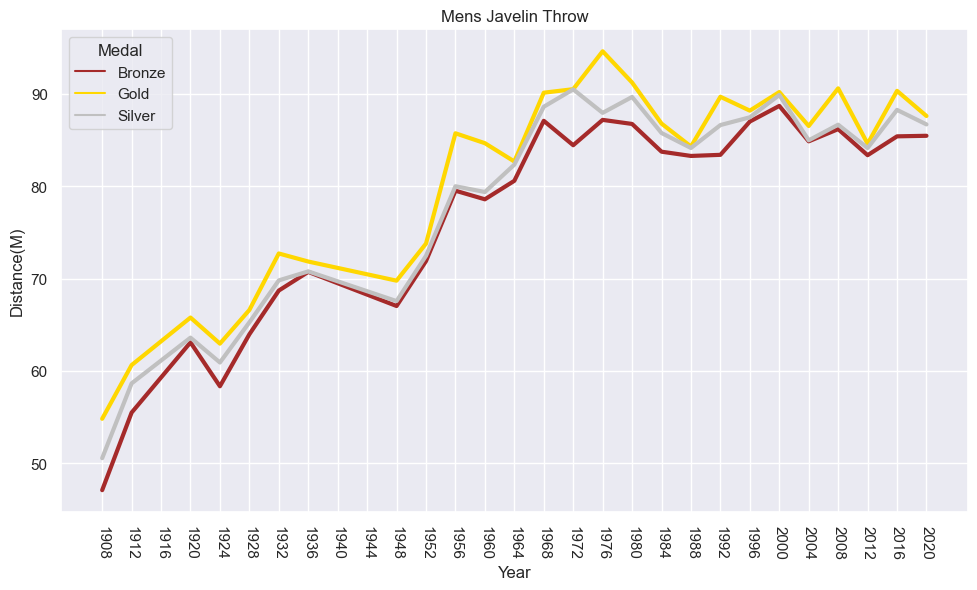

In [34]:
import numpy as np 

mens= javelin_df[javelin_df['Gender']=='Men']

sns.set_style(style='white')
sns.set(rc={'figure.figsize':(11.7,6.27)})
plt.xticks(np.arange(1908, 2021, 4), rotation=270)
plt.ylabel('Distance(M)')
plt.title('Mens Javelin Throw',)
sns.lineplot(data=mens, x="Year", y="Distance",hue='Medal', palette=['brown', 'gold', 'silver'], linewidth=3)

plt.show()

There was a steady increase in distance until 1976 with a sudden and steady decrease until 1988. What happened? I would have expected this upward trend to continue but that is obviously not the case. After doing some reasearch to find the cause, I found that during that timeframe in 1986, the javelin underwent a major redesign which drastically decreased the aerodynamics, thus reducing the distance it could be thrown. The reason for this change is quite astonishing and will be explored in the next graph.  

In [35]:
records = []
for i, table in enumerate(pd.read_html('https://en.wikipedia.org/wiki/Men%27s_javelin_throw_world_record_progression#cite_note-iaaf-1')):
    if i >2:
        break
    records.append(table)

In [36]:
records_df = pd.concat(records)
records_df.head()

,Mark,Athlete,Date,Location,Duration of record
0,62.32,Eric Lemming (SWE),29 September 1912,"Stockholm, Sweden[1]",NaN
1,66.1,Jonni Myyrä (FIN),25 August 1919,"Stockholm, Sweden[1]",NaN
2,66.62,Gunnar Lindström (SWE),12 October 1924,"Eksjö, Sweden[1]",NaN
3,69.88,Eino Penttilä (FIN),8 October 1927,"Viipuri, Finland[1]",NaN
4,71.01,Erik Lundqvist (SWE),15 August 1928,"Stockholm, Sweden[1]",NaN


In [37]:
records_df['Date']=pd.to_datetime(records_df['Date'], errors='ignore')

In [38]:
records_df.loc[records_df['Date']=='7 September 1934[1]','Date']='7 September 1934'
records_df['Date']=pd.to_datetime(records_df['Date'])

records_df['Year']=records_df['Date'].apply(lambda x: x.year)

In [39]:
records_df['Mark']=records_df['Mark'].apply(lambda x: x.replace('*',"") if isinstance(x,str) else x)
                         
records_df['Mark']=records_df['Mark'].astype('float')

In [40]:
yr_to_yr_records = records_df.groupby('Year')['Mark'].nlargest(1).droplevel(level=1)

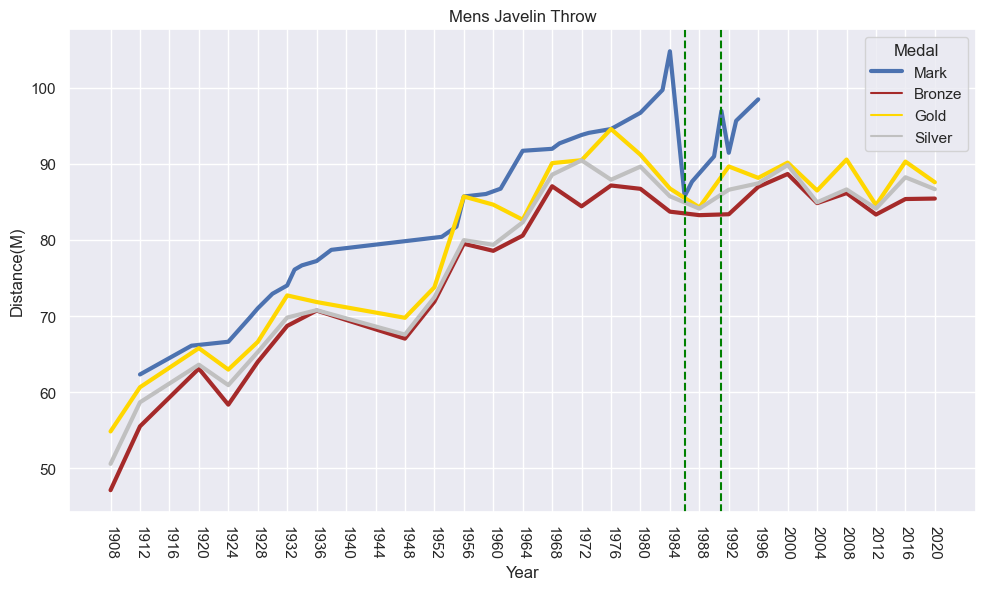

In [41]:
import numpy as np 

mens= javelin_df[javelin_df['Gender']=='Men']

ax=yr_to_yr_records.plot(linewidth=3)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(11.7,6.27)})
plt.xticks(np.arange(1908, 2021, 4), rotation=270)
plt.title('Mens Javelin Throw',)
sns.lineplot(data=mens, x="Year", y="Distance",hue='Medal', palette=['brown', 'gold', 'silver'], linewidth=3)
plt.ylabel('Distance(M)')
ax.axvline(x = 1986,ymin = 0, ymax = 1, color='green', linestyle='--') 
ax.axvline(x = 1991,ymin = 0, ymax = 1, color='green', linestyle='--') 
plt.show()

I performed some additional datascraping to extract data regarding the changes in javelin world record over time. The blue line represents the world record distances and as you can see, the record climbs up to 104.80M! This record was set in 1984 by Uwe Hohn and dubbed the 'eternal world record'. As you can imagine, the stadiums could no longer hold such insane distances so changes needed to be implemented. The 2 dashed green lines represent the year javelin redesigns were implemented. The current world record is held by Jan Zelezny with a distance of 98.48M. This record still stands to this day(27 years). 

Now lets review trends in distance for in womens javelin

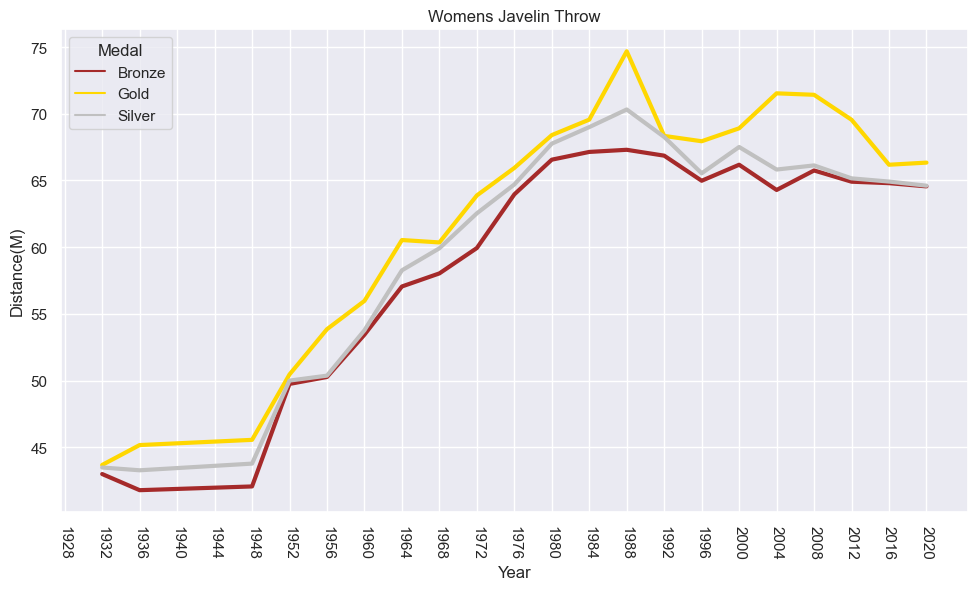

In [42]:
womens= javelin_df[javelin_df['Gender']=='Women']

sns.set_style(style='white')
sns.set(rc={'figure.figsize':(11.7,6.27)})
plt.xticks(np.arange(1908, 2021, 4), rotation=270)
plt.title('Womens Javelin Throw',)
plt.ylabel('Distance(M)')
sns.lineplot(data=womens, x="Year", y="Distance",hue='Medal', palette=['brown', 'gold', 'silver'], linewidth=3)
plt.show()

It looks like a similar trend to the mens with a steady increase up to 1988 and then a sudden decrease after. It would make sense to assume womens javelin saw similar design changes making it harder to throw further distances.

In [43]:
womens_records = []
for i, table in enumerate(pd.read_html('https://en.wikipedia.org/wiki/Women%27s_javelin_throw_world_record_progression')):
    if i >1:
        break
    womens_records.append(table)

womens_records_df = pd.concat(womens_records, ignore_index=True)
womens_records_df

,Mark,Athlete,Country,Venue,Date
0,25.010,Božena Šrámková,Czechoslovakia,Prague,1922-08-06
1,25.325,Božena Šrámková,Czechoslovakia,Prague,1922-08-13
2,27.240,Marie Janderová,Czechoslovakia,Ostrava,1924-05-25
3,37.575,Guschi Hargus,Germany,Berlin,1927-06-12
4,38.390,Guschi Hargus,Germany,Berlin,1928-08-18
5,40.270,Ellen Braumüller,Germany,Berlin,1930-07-12
6,42.280,Ellen Braumüller,Germany,Magdeburg,1931-08-02
7,44.640,Ellen Braumüller,Germany,Berlin,1932-06-12
8,46.745,Nan Gindele,United States,Chicago,1932-06-18
9,47.240,Anneliese Steinheuer,Germany,Frankfurt,1942-06-21


In [44]:
womens_records_df['Date']=pd.to_datetime(womens_records_df['Date'])

womens_records_df['Year']=womens_records_df['Date'].apply(lambda x: x.year)
womens_records_df['Mark']=womens_records_df['Mark'].astype('float')

womens_yr_to_yr_records = womens_records_df.groupby('Year')['Mark'].nlargest(1).droplevel(level=1)
womens_yr_to_yr_records

Year
1922    25.325
1924    27.240
1927    37.575
1928    38.390
1930    40.270
1931    42.280
1932    46.745
1942    47.240
1947    48.210
1948    48.630
1949    53.410
1954    55.480
1958    57.490
1960    59.550
1963    59.780
1964    62.400
1972    65.060
1973    66.100
1974    67.220
1976    69.120
1977    69.320
1979    69.520
1980    70.080
1981    71.880
1982    74.200
1983    74.760
1985    75.400
1986    77.440
1987    78.900
1988    80.000
1999    67.090
2000    69.480
2001    71.540
2005    71.700
2008    72.280
Name: Mark, dtype: float64

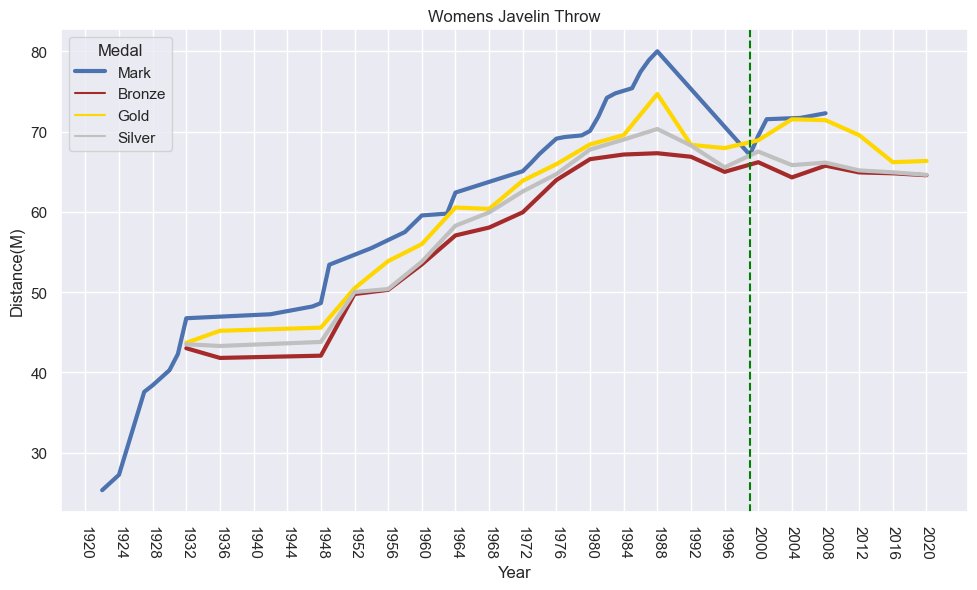

In [45]:
# womens

womens= javelin_df[javelin_df['Gender']=='Women']

ax=womens_yr_to_yr_records.plot(linewidth=3)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(11.7,6.27)})
plt.xticks(np.arange(1908, 2021, 4), rotation=270)
plt.title('Womens Javelin Throw',)
plt.ylabel('Distance(M)')
sns.lineplot(data=womens, x="Year", y="Distance",hue='Medal', palette=['brown', 'gold', 'silver'], linewidth=3)
ax.axvline(x = 1999,ymin = 0, ymax = 1, color='green', linestyle='--') 

As expected, the womens javelin also saw a similar redesign in 1999, decreasing its ability to travel further distances. Something I do find interesting is that the womens world record reached just over 80M, so it was never in a "danger zone". I wonder if it was the expectation for these distances to keep improving which prompted the desgin change. The current womens javelin world record is held by Barbora Spotakova with a distance of 72.28M.

# Summary

#### 1. Who is the best Javelin thrower?

Since there are many metrics that can be assessed to answer this question, there is no clear answer. With that being said, it would be difficult to argue against Jan Zelezny being the best thrower in history. He holds the current world record which has stood for 27 years and is also the most decorated olympian winning 3 gold medals. However, the olympic record is held by Andreas Thorkildsen, so one could argue in his favor since he holds the record in the biggest competition in the world, the Olympics.

In terms of best female javelin thrower, it would be hard to argue against Barbora Spotakova since she holds the world record and has won 2 olympic gold medals 



#### 2. Which countries produce the best throwers?

In terms of total olympic medals across both women and men, Finland dominates the competition. However, Germany produces the best female javelin throwers based on the total number of olympic medals won.

#### 3. Have throwing distances increased or decreased over time

After exploring and mapping the data, it is a mixture of both. Distances were steadily increasing over time up until the redesign implementation. Since then, distances have dropped off and remained mostly level